In [2]:
import pandas as pd
import os
if "ipynb" in os.getcwd():
    os.chdir("..")

data = pd.read_csv("./anomaly_data/dockerfiles_rubisdb_1_20190818-1900_20190819-0900_5.csv")
data.head()

,timestamp,container_cpuusage,container_networkRx,container_networkTx,node_cpuusage,node_networkRx,node_networkTx
0,2019-08-18 19:00:00,10.752060,164413.4,1619722.8,11.7,250980.2,1878044.4
1,2019-08-18 19:00:05,12.736976,207562.2,2076331.0,13.0,270323.6,2017401.6
2,2019-08-18 19:00:10,7.205540,132442.6,1418091.8,13.1,295723.6,2235965.0
3,2019-08-18 19:00:15,15.784692,282975.0,2808118.2,15.5,369755.0,2786956.4
4,2019-08-18 19:00:20,13.059152,216594.6,2100586.4,13.6,286063.0,2128105.8


In [16]:
df_1 = data["node_cpuusage"]
df_1.describe()

count    10081.000000
mean        12.360867
std          3.133804
min          2.800000
25%         10.800000
50%         12.100000
75%         13.500000
max         49.500000
Name: node_cpuusage, dtype: float64

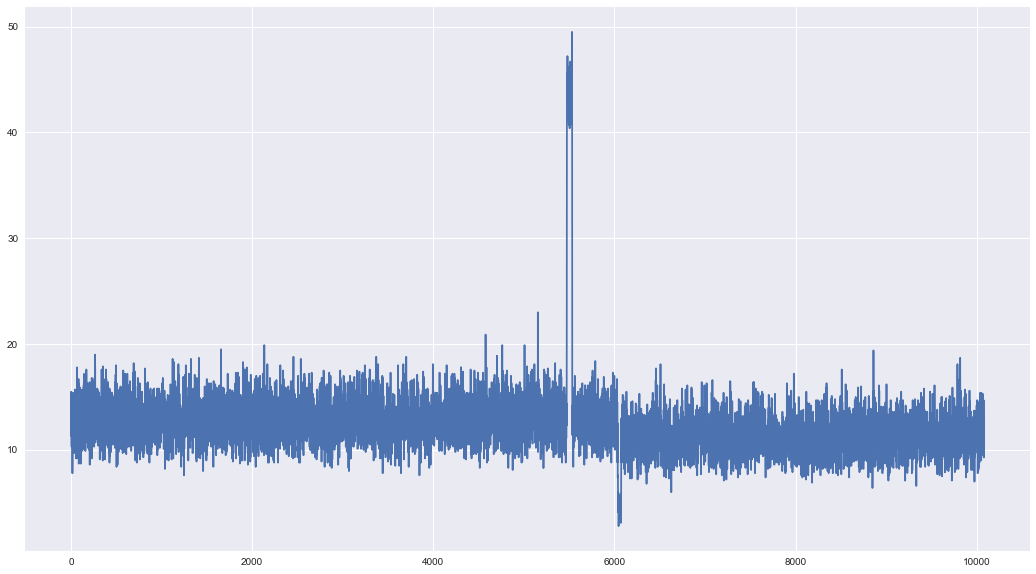

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
plt.style.use("seaborn")

plt.figure(figsize = (18, 10))
plt.plot(df_1)
plt.show()

In [72]:
'''
特異スペクトル変換の実装
'''
import numpy as np
import time

def create_matrix(data, start, end, window_size):

    '''
    スライド窓による行列の作成
    '''

    row_size = window_size
    column_size = end - start + 1
    matrix = np.empty((row_size, column_size))
    i = 0
    for t in range(start, end+1):
        matrix[:, i] = data[t-1:t-1+row_size]
        i += 1

    return matrix

def sst(data, window_size, m = 2, k = None, L = None):
    start_time = time.time()
    '''
    m : パターン数(主成分分析した時の採用ベクトル本数)
    k : 履歴行列の列サイズ
    L : ラグの大きさ
    data: numpy 配列を仮定
    '''

    '''
    if not isinstance(data, np.ndarray):   
        data = np.array(data)  

    '''

    if k is None:
        k = int(np.round(window_size/2))  


    if L is None:
        L = int(np.round(k))
        #L = int(np.round(k/2))

    # dataをsample queue に変えたら
    T = len(data)

    # 計算範囲
    start_calu = k + window_size
    end_calu = T - L + 1
    changing_scores = np.zeros(len(data))
    for t in range(start_calu, end_calu + 1):

        # 履歴行列
        start_traject = t - window_size - k + 1
        end_traject = t - window_size
        traject_matrix = create_matrix(data, start_traject, end_traject, window_size)

        # test matrix
        start_test = start_traject + L
        end_test = end_traject + L
        test_matrix = create_matrix(data, start_test, end_test, window_size)

        # 特異値分解
        U_traject, U_eigen_value, o = np.linalg.svd(traject_matrix, full_matrices = False)   # 一つ目の返り値だけがほしいのでこのようにする
        Q_test, _, o = np.linalg.svd(test_matrix, full_matrices = False)        # 上記と同様
        u_m = U_traject[:, :m]    # 列成分をm個抽出
        q_m = Q_test[:, :m]      # 列成分をm個抽出

        eigen_max = np.linalg.svd(u_m.T @ q_m, full_matrices = False, compute_uv=False)    # @は行列の積を表す演算
        changing_scores[t] = 1 -eigen_max[0]

    return changing_scores

In [61]:
X = df_1.as_matrix()
X

C:\Users\neki-at\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([11.7, 13. , 13.1, ..., 13.5, 13.1, 10.4])

In [71]:
changing_score_list_5 = sst(data = X, window_size = 100)

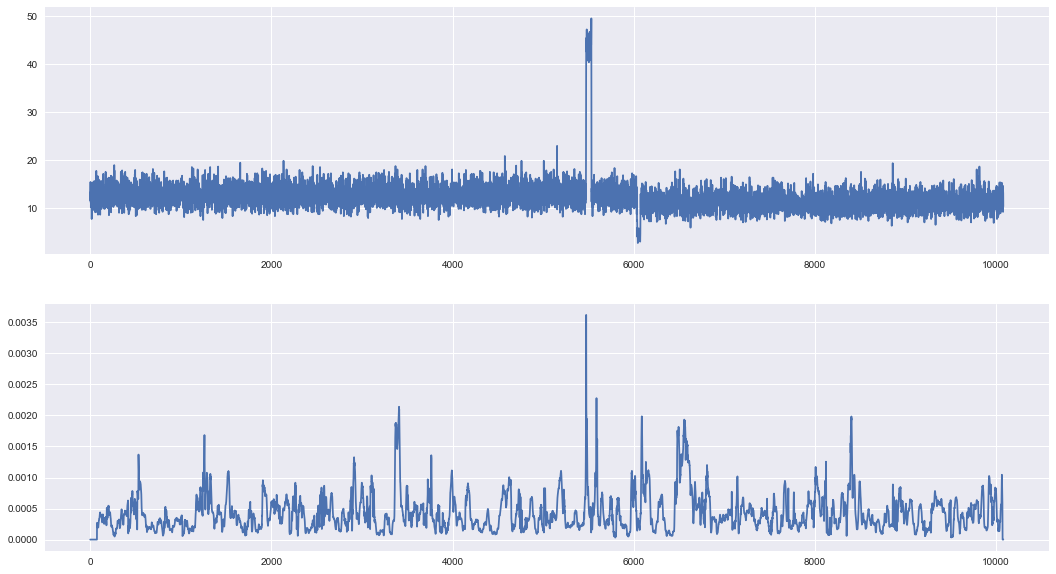

In [49]:
plt.figure(figsize = (18, 10))
plt.subplot(2, 1, 1)
plt.title(())
plt.plot(df_1)

plt.subplot(2, 1, 2)
plt.plot(changing_score_list)
plt.show()

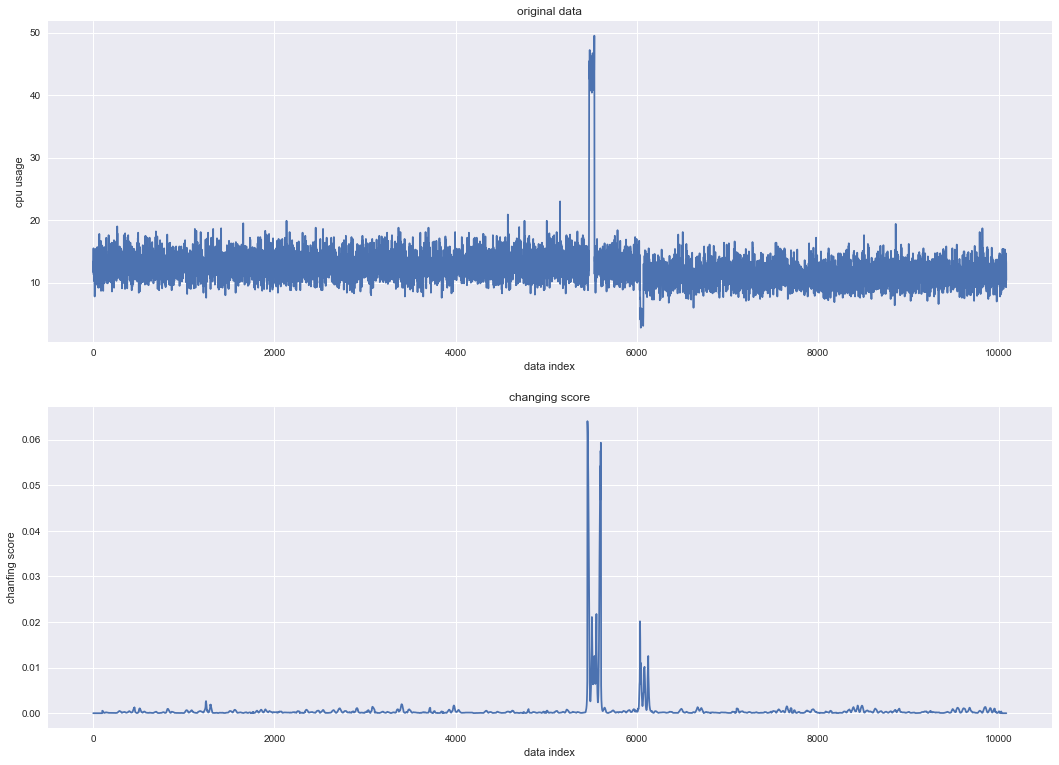

In [55]:
plt.figure(figsize = (18, 13))
plt.subplot(2, 1, 1)
plt.title("original data")
plt.ylabel("cpu usage")
plt.xlabel("data index")
plt.plot(df_1)

plt.subplot(2, 1, 2)
plt.title("changing score")
plt.ylabel("chanfing score")
plt.xlabel("data index")
plt.plot(changing_score_list_2)
plt.show()

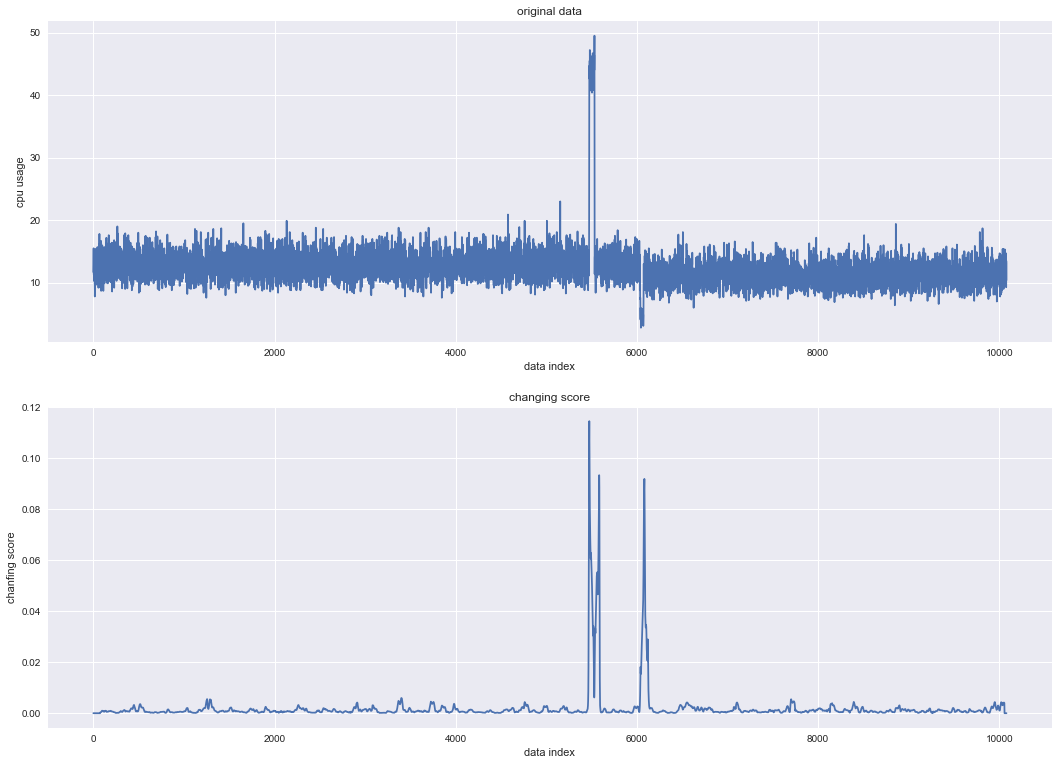

In [59]:
plt.figure(figsize = (18, 13))
plt.subplot(2, 1, 1)
plt.title("original data")
plt.ylabel("cpu usage")
plt.xlabel("data index")
plt.plot(df_1)

plt.subplot(2, 1, 2)
plt.title("changing score")
plt.ylabel("chanfing score")
plt.xlabel("data index")
plt.plot(changing_score_list_3)
plt.show()

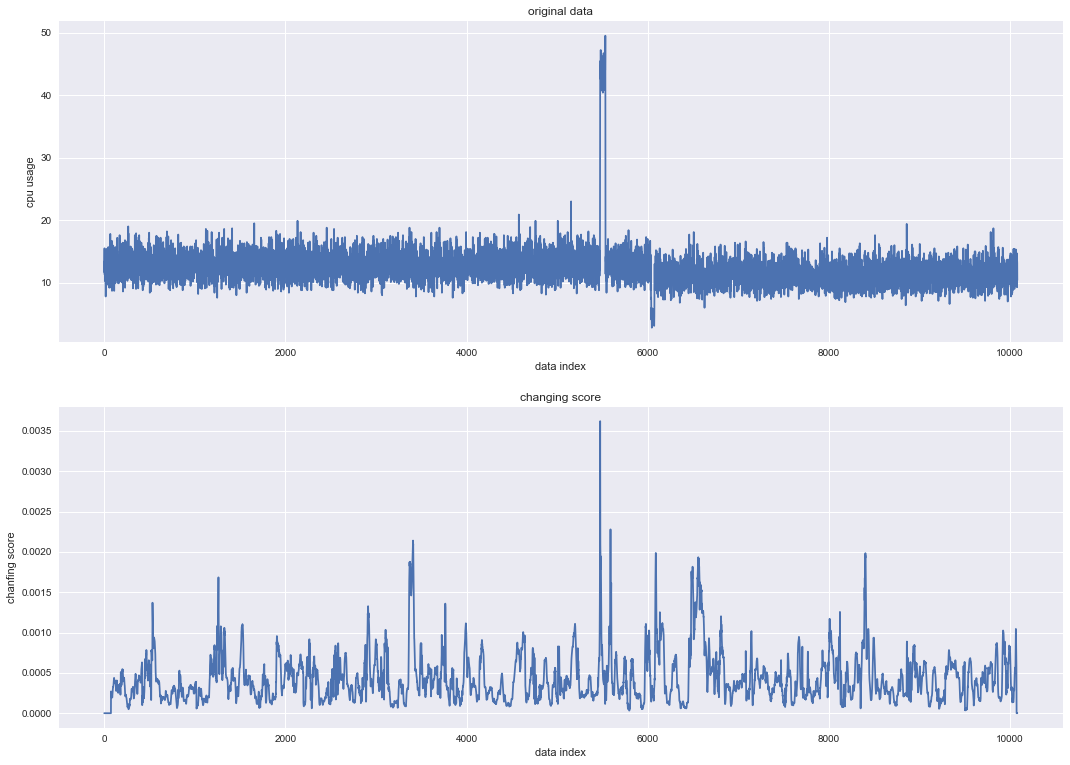

In [63]:
plt.figure(figsize = (18, 13))
plt.subplot(2, 1, 1)
plt.title("original data")
plt.ylabel("cpu usage")
plt.xlabel("data index")
plt.plot(df_1)

plt.subplot(2, 1, 2)
plt.title("changing score")
plt.ylabel("chanfing score")
plt.xlabel("data index")
plt.plot(changing_score_list_4)
plt.show()